<a href="https://colab.research.google.com/github/Kgs-Mathaba/Time_Series_modelling_using_Facebook_Prophet/blob/main/Univariate_Time_Series_using_FB_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fbprophet

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (15,10)
mpl.rcParams['axes.grid'] = False 

In [3]:
url = 'https://raw.githubusercontent.com/Kgs-Mathaba/Time_Series_modelling_using_Facebook_Prophet/main/nyc_energy_consumption.csv'
df = pd.read_csv(url)

In [4]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeStamp  49205 non-null  object 
 1   demand     49124 non-null  float64
 2   precip     48975 non-null  float64
 3   temp       49019 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [6]:
df.shape

(49205, 4)

In [7]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [8]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [10]:
fig = px.line(df, x = 'timeStamp', y='demand', title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
          dict(count=1, label='1y', step='year', stepmode='backward'),
          dict(count=2, label='3y', step='year', stepmode='backward'),
          dict(count=3, label='5y', step='year', stepmode='backward'),
          dict(step='all'),
        ])
    )
)
fig.show()

In [11]:
ny_df = df.set_index('timeStamp')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0243a1190>,
      dtype=object)

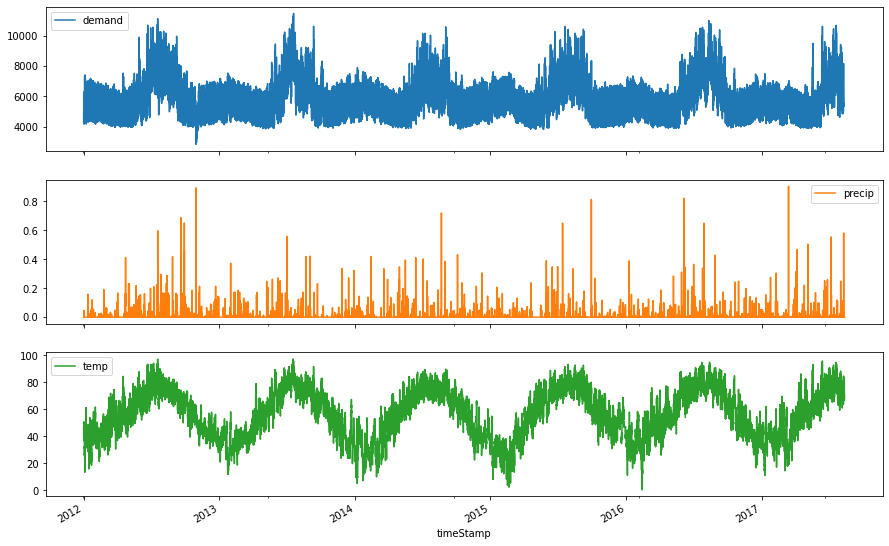

In [12]:
ny_df.plot(subplots=True)

In [13]:
ny_df_daily = ny_df.resample('D').mean()

In [14]:
ny_df_daily

,demand,precip,temp
timeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500
...,...,...,...
2017-08-08,6471.626042,0.000000,71.039167
2017-08-09,6811.112167,0.047529,73.852500
2017-08-10,5582.297000,0.002033,75.217500


In [15]:
from fbprophet import Prophet

In [16]:
ny_df_final = ny_df_daily.reset_index()[['timeStamp', 'demand']].rename({'timeStamp': 'ds', 'demand':'y'}, axis='columns')


In [17]:
ny_df_final.head()

,ds,y
0,2012-01-01,4954.833333
1,2012-01-02,5302.954167
2,2012-01-03,6095.512500
3,2012-01-04,6336.266667
4,2012-01-05,6130.245833


In [18]:
train = ny_df_final[(ny_df_final['ds'] >= '2012-01-01')&(ny_df_final['ds'] <= '2017-04-30')]
test = ny_df_final[(ny_df_final['ds'] > '2017-04-30')]

In [19]:
train.shape, test.shape

((1947, 2), (104, 2))

In [20]:
test.head()

,ds,y
1947,2017-05-01,5417.231583
1948,2017-05-02,5697.950042
1949,2017-05-03,5354.628500
1950,2017-05-04,5235.704833
1951,2017-05-05,5358.639500


In [21]:
prophecy = Prophet(interval_width=0.95, yearly_seasonality=True)

In [22]:
prophecy.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
prophecy.params

{'beta': array([[-0.03458069, -0.0705141 ,  0.05760564,  0.04705875, -0.01406572,
         -0.005001  , -0.00386455, -0.00073737,  0.00242053, -0.00755783,
          0.00405203,  0.0048309 , -0.00789597, -0.00470246,  0.00701919,
         -0.00268503, -0.00127789,  0.00170614,  0.00035376, -0.00021813,
         -0.02824817,  0.0238519 ,  0.02062351,  0.00054815, -0.0049496 ,
         -0.00501087]]),
 'delta': array([[ 2.97534563e-09, -2.54605198e-07, -1.01979086e-01,
         -1.12338365e-08,  2.80534300e-09,  1.62508765e-08,
         -5.22679734e-08, -1.16075049e-08, -1.53930702e-07,
         -2.92604184e-08, -2.69181000e-02, -7.35866468e-02,
         -1.45876933e-08, -5.89760992e-08,  2.35046545e-01,
          5.85259548e-05, -1.05435640e-07, -8.71744213e-02,
         -4.32663939e-02, -6.02327178e-08,  2.83861158e-08,
          3.24800542e-08,  8.00639127e-03,  3.86001162e-03,
          3.53863651e-07]]),
 'k': array([[0.08895525]]),
 'm': array([[0.59330417]]),
 'sigma_obs': array([

In [24]:
future = prophecy.make_future_dataframe(periods=104)
future.tail()


,ds
2046,2017-08-08
2047,2017-08-09
2048,2017-08-10
2049,2017-08-11
2050,2017-08-12


In [25]:
forecast = prophecy.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2046,2017-08-08,7587.395330,6665.972986,8543.529407
2047,2017-08-09,7576.508802,6705.368461,8438.517886
2048,2017-08-10,7531.224521,6667.183846,8465.134925
2049,2017-08-11,7486.440569,6581.701846,8425.982025
2050,2017-08-12,6911.617225,5953.398488,7806.421850


In [26]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

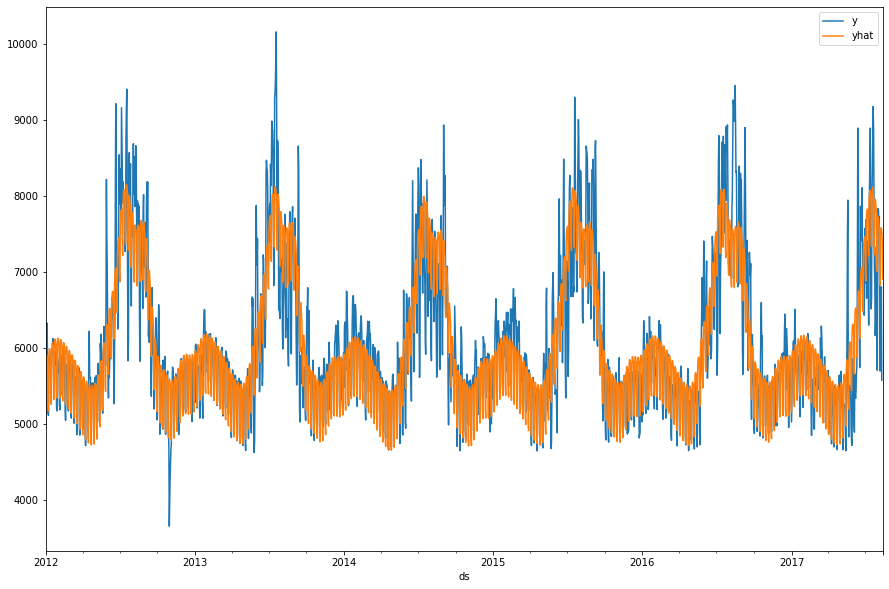

In [27]:
# Compare actual value y and predicted value yhat
pd.concat([ny_df_final.set_index('ds')['y'], forecast.set_index('ds')['yhat']], axis=1).plot()

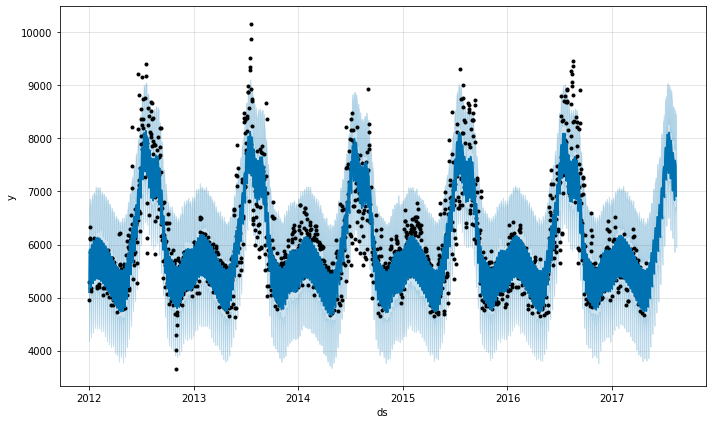

In [28]:
fig1 = prophecy.plot(forecast)

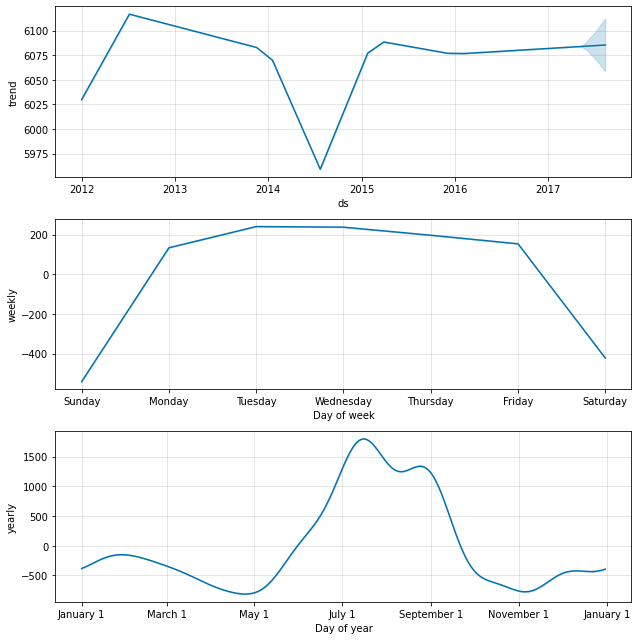

In [29]:
fig2 = prophecy.plot_components(forecast)

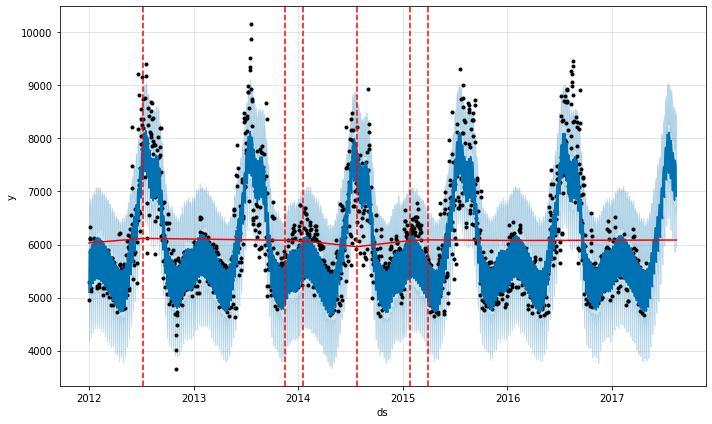

In [30]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophecy.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophecy, forecast)

In [33]:
 deltas = prophecy.params['delta'].mean(0)
 deltas

array([ 2.97534563e-09, -2.54605198e-07, -1.01979086e-01, -1.12338365e-08,
        2.80534300e-09,  1.62508765e-08, -5.22679734e-08, -1.16075049e-08,
       -1.53930702e-07, -2.92604184e-08, -2.69181000e-02, -7.35866468e-02,
       -1.45876933e-08, -5.89760992e-08,  2.35046545e-01,  5.85259548e-05,
       -1.05435640e-07, -8.71744213e-02, -4.32663939e-02, -6.02327178e-08,
        2.83861158e-08,  3.24800542e-08,  8.00639127e-03,  3.86001162e-03,
        3.53863651e-07])

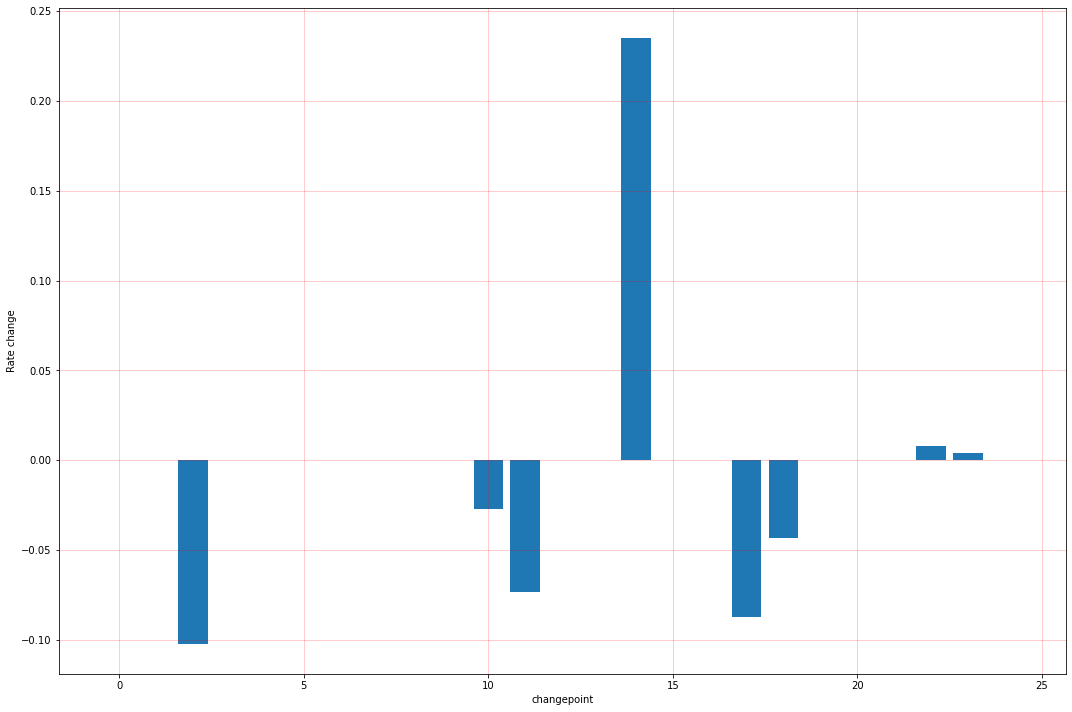

In [35]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='red', ls='-', lw=1, alpha=0.2)
ax.set_ylabel("Rate change")
ax.set_xlabel('changepoint')
fig.tight_layout()

In [36]:
prophecy.changepoints

62     2012-03-03
124    2012-05-04
187    2012-07-06
249    2012-09-06
311    2012-11-07
373    2013-01-08
436    2013-03-12
498    2013-05-13
560    2013-07-14
622    2013-09-14
685    2013-11-16
747    2014-01-17
809    2014-03-20
871    2014-05-21
934    2014-07-23
996    2014-09-23
1058   2014-11-24
1120   2015-01-25
1183   2015-03-29
1245   2015-05-30
1307   2015-07-31
1369   2015-10-01
1432   2015-12-03
1494   2016-02-03
1556   2016-04-05
Name: ds, dtype: datetime64[ns]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


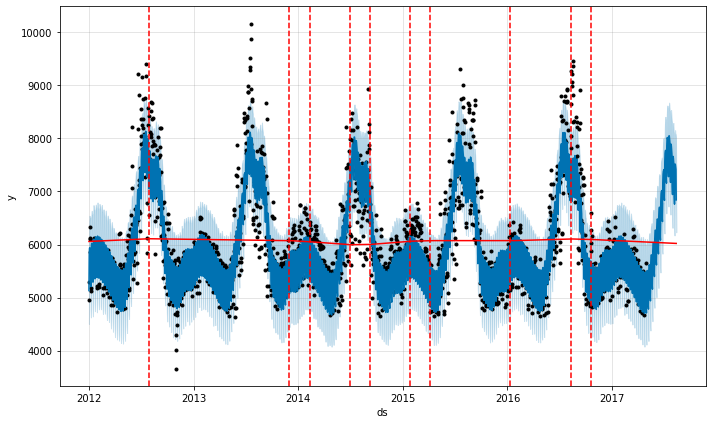

In [37]:
pro_change = Prophet(changepoint_range = 0.9, yearly_seasonality=True)
forecast = pro_change.fit(train).predict(future)
fig = pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [38]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

fig = plot_plotly(prophecy, forecast) # This returns a plotly figure
py.iplot(fig)

In [39]:
from fbprophet.diagnostics import cross_validation
cv_results = cross_validation(model = prophecy, initial='731 days', horizon='365 days')
cv_results.head(10)

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-05-02,5559.551339,4720.680249,6384.593716,5460.325000,2014-05-01
1,2014-05-03,4969.534110,4154.708275,5767.129393,4893.683333,2014-05-01
2,2014-05-04,4845.648008,4001.731545,5680.646763,4764.137500,2014-05-01
3,2014-05-05,5526.522430,4664.320108,6336.377153,5406.762500,2014-05-01
4,2014-05-06,5621.421825,4835.786520,6468.117807,5409.750000,2014-05-01
5,2014-05-07,5677.305736,4790.269458,6483.497218,5410.112500,2014-05-01
6,2014-05-08,5715.794170,4845.409245,6507.514566,5488.658333,2014-05-01
7,2014-05-09,5720.216734,4874.116243,6508.550233,5510.075000,2014-05-01
8,2014-05-10,5159.775658,4297.393204,5983.131830,5124.200000,2014-05-01
9,2014-05-11,5064.529588,4151.429729,5850.951433,4968.770833,2014-05-01


In [40]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,251934.957320,501.931228,406.226480,0.073006,0.064884,0.890110
1,37 days 00:00:00,258700.644740,508.626233,413.610053,0.074289,0.066338,0.890110
2,37 days 12:00:00,261010.981546,510.892339,417.001487,0.074872,0.067382,0.890110
3,38 days 00:00:00,263880.662431,513.693160,420.198633,0.075152,0.068328,0.890110
4,38 days 12:00:00,267581.621653,517.282922,425.433592,0.075989,0.069015,0.890110
...,...,...,...,...,...,...,...
653,363 days 00:00:00,259816.478758,509.721962,448.447325,0.082792,0.081943,0.983516
654,363 days 12:00:00,261440.978078,511.312994,449.524741,0.082983,0.081943,0.983516
655,364 days 00:00:00,266023.137790,515.774309,453.230988,0.083848,0.083850,0.983516
656,364 days 12:00:00,266023.939627,515.775086,452.936386,0.083833,0.083850,0.983516
